<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Понижение размерности**


Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Ознакомиться с основными методами понижения размерности, изучить их применение на практике, сравнить эффективность разных методов и визуализировать результаты.

**Содержание работы**

1. Сгенерируйте синтетический двумерный датасет с высокой степенью корреляции между признаками.
2. Понизьте размерность датасета до одной при помощи метода PCA и визуализируйте его до и после.
3. Примените метод главных компонент на более многомерных данных. Визуализируйте две главные компоненты.
4. Выберите оптимальное количество главных компонент по методу локтя.
5. Сгенерируйте двумерный датасет для классификации и примените на нем метод линейного дискриминантного анализа.
6. Сгенерируйте двумерный датасет для классификации и примените на нем метод понижения размерности t-SNE.
7. Сгенерируйте линейно неразделимый двумерный датасет для классификации и опробуйте на нем метод KernelPCA с различными ядрами.

**PCA на сгенерированных данных**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_blobs, make_circles
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

In [ ]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

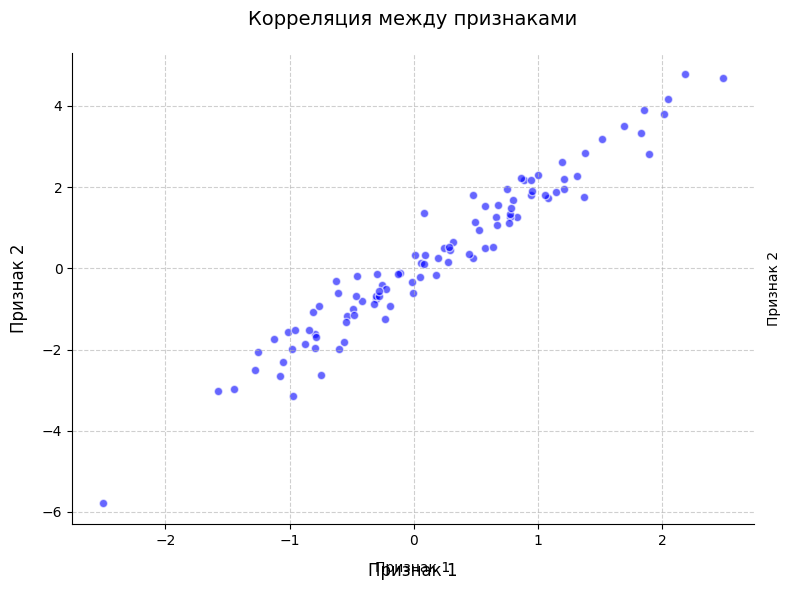

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, color='blue', edgecolors='w')

plt.xlabel('Признак 1', fontsize=12, labelpad=10)
plt.ylabel('Признак 2', fontsize=12, labelpad=10)
plt.title('Корреляция между признаками', fontsize=14, pad=20)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.text(1.02, 0.5, 'Признак 2', rotation=90,
         verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.5, -0.1, 'Признак 1',
         horizontalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

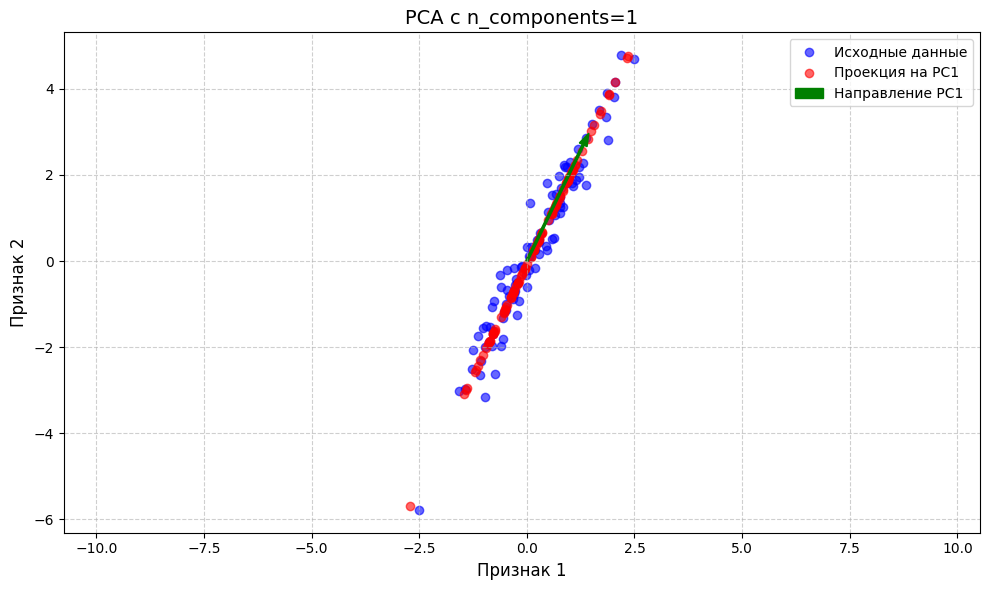

In [ ]:
X_reconstructed = pca.inverse_transform(X_pca)

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], alpha=0.6, color='blue', label='Исходные данные')

plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.6, color='red',
            label='Проекция на PC1')

pc1_direction = pca.components_[0]
plt.arrow(0, 0, pc1_direction[0]*3, pc1_direction[1]*3, color='green',
          width=0.05, head_width=0.2, label='Направление PC1')

plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.title('PCA с n_components=1', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.43630997 0.89979643]]
Объясненная дисперсия: [0.99184437]


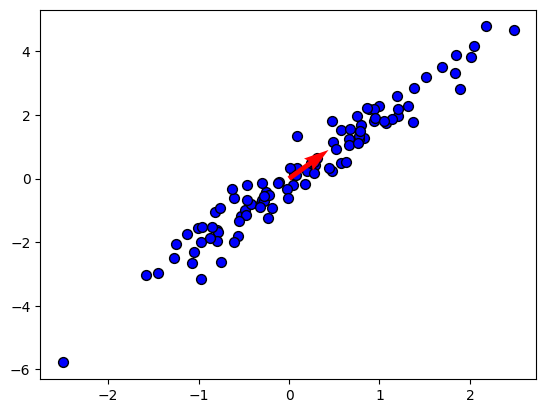

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

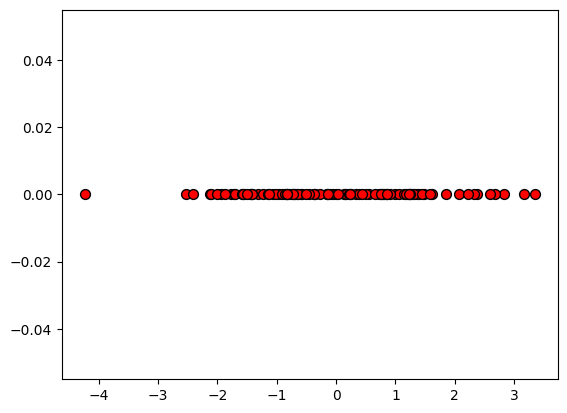

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

**PCA на многомерных данных**

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

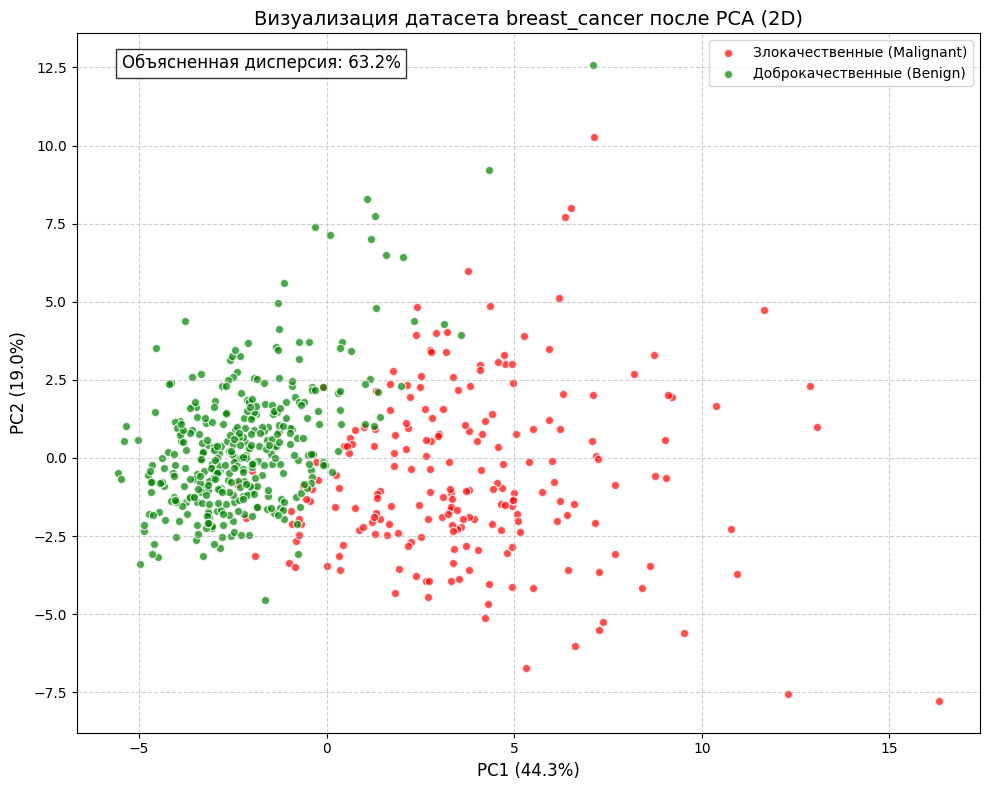

In [ ]:
plt.figure(figsize=(10, 8))

# Разделение точек по классам
malignant = X_pca[y == 0]
benign = X_pca[y == 1]

# Визуализация
plt.scatter(malignant[:, 0], malignant[:, 1], color='red', alpha=0.7,
            label='Злокачественные (Malignant)', edgecolor='w')
plt.scatter(benign[:, 0], benign[:, 1], color='green', alpha=0.7,
            label='Доброкачественные (Benign)', edgecolor='w')

# Настройки графика
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
plt.title('Визуализация датасета breast_cancer после PCA (2D)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Добавляем объяснение дисперсии
plt.text(0.05, 0.95, f'Объясненная дисперсия: {sum(pca.explained_variance_ratio_):.1%}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


**Метод локтя для PCA**

In [ ]:
n_components_range = range(1, 31)
explained_variance = []

for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

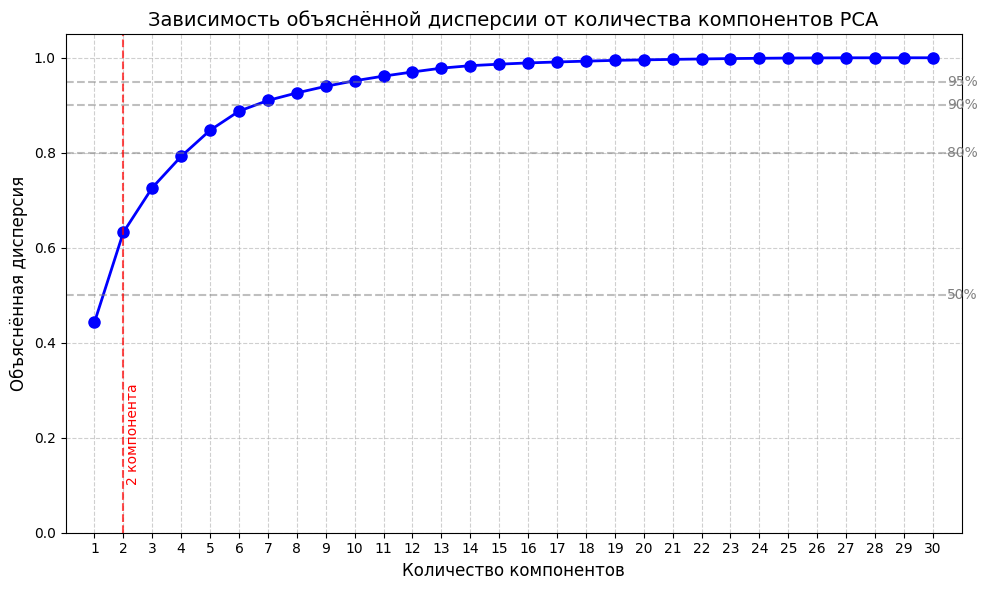

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(n_components_range, explained_variance, 'b-o', linewidth=2, markersize=8)
plt.xlabel('Количество компонентов', fontsize=12)
plt.ylabel('Объяснённая дисперсия', fontsize=12)
plt.title('Зависимость объяснённой дисперсии от количества компонентов PCA', fontsize=14)

for yval in [0.5, 0.8, 0.9, 0.95]:
    plt.axhline(y=yval, color='gray', linestyle='--', alpha=0.5)
    plt.text(30.5, yval, f'{yval:.0%}', va='center', ha='left', color='gray')

plt.axvline(x=2, color='red', linestyle='--', alpha=0.7)
plt.text(2.1, 0.1, '2 компонента', rotation=90, va='bottom', color='red')

plt.xlim(0, 31)
plt.ylim(0, 1.05)
plt.xticks(n_components_range)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


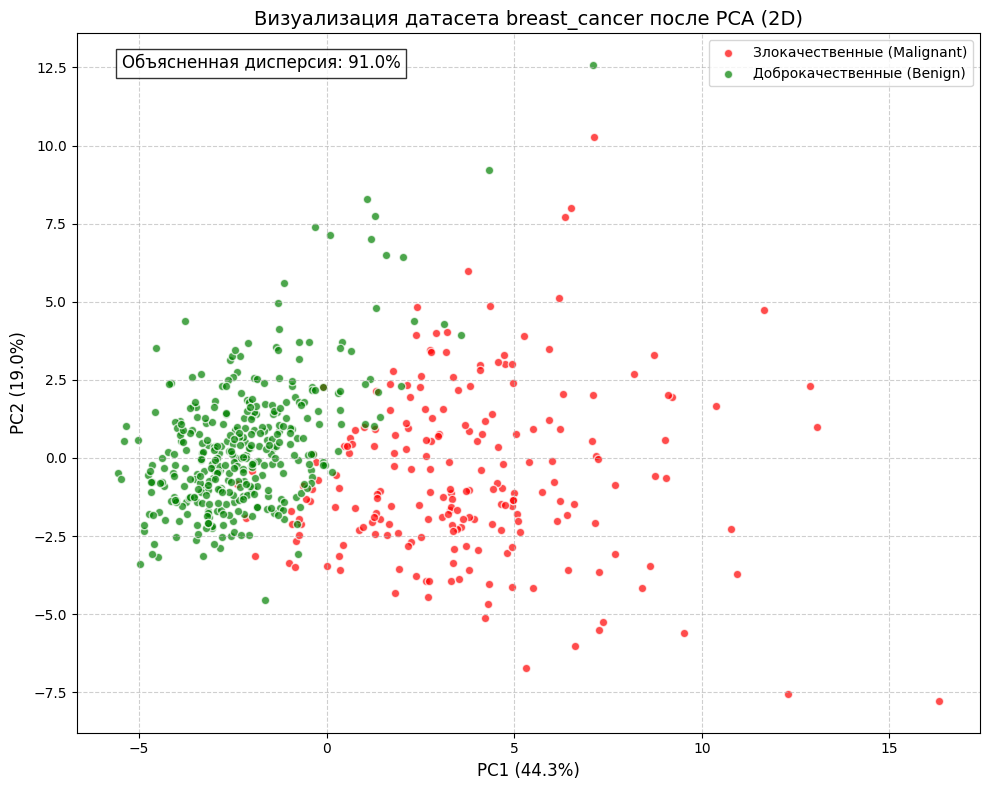

In [ ]:
plt.figure(figsize=(10, 8))

# Разделение точек по классам
malignant = X_pca[y == 0]
benign = X_pca[y == 1]

# Визуализация
plt.scatter(malignant[:, 0], malignant[:, 1], color='red', alpha=0.7,
            label='Злокачественные (Malignant)', edgecolor='w')
plt.scatter(benign[:, 0], benign[:, 1], color='green', alpha=0.7,
            label='Доброкачественные (Benign)', edgecolor='w')

# Настройки графика
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
plt.title('Визуализация датасета breast_cancer после PCA (2D)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Добавляем объяснение дисперсии
plt.text(0.05, 0.95, f'Объясненная дисперсия: {sum(pca.explained_variance_ratio_):.1%}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

**Метод LDA**

In [ ]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

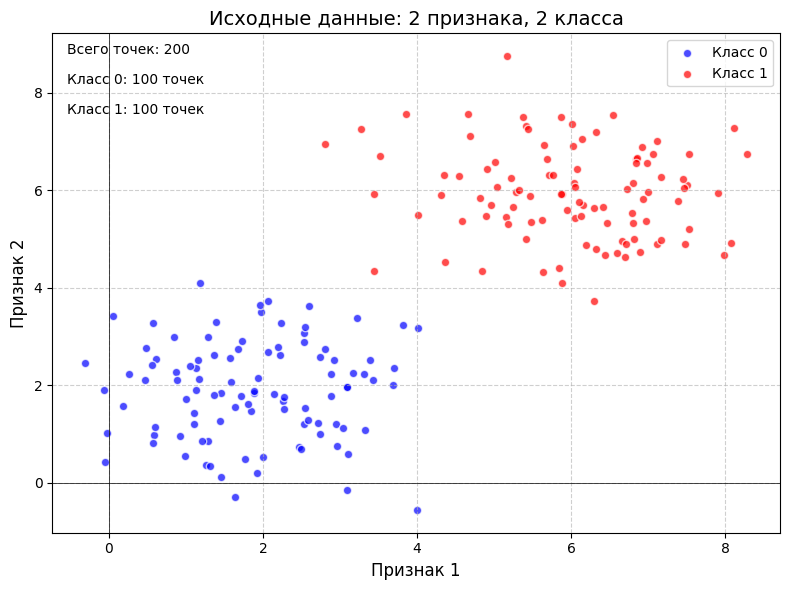

In [ ]:
plt.figure(figsize=(8, 6))

# Визуализация данных по классам
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],
            color='blue', alpha=0.7, label='Класс 0', edgecolor='w')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],
            color='red', alpha=0.7, label='Класс 1', edgecolor='w')

# Настройки графика
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.title('Исходные данные: 2 признака, 2 класса', fontsize=14)
plt.legend(fontsize=10)

# Добавление сетки и границ
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Добавление статистической информации
plt.text(0.02, 0.98, f'Всего точек: {len(X)}',
         transform=plt.gca().transAxes, verticalalignment='top')
plt.text(0.02, 0.92, f'Класс 0: {n_samples} точек',
         transform=plt.gca().transAxes, verticalalignment='top')
plt.text(0.02, 0.86, f'Класс 1: {n_samples} точек',
         transform=plt.gca().transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

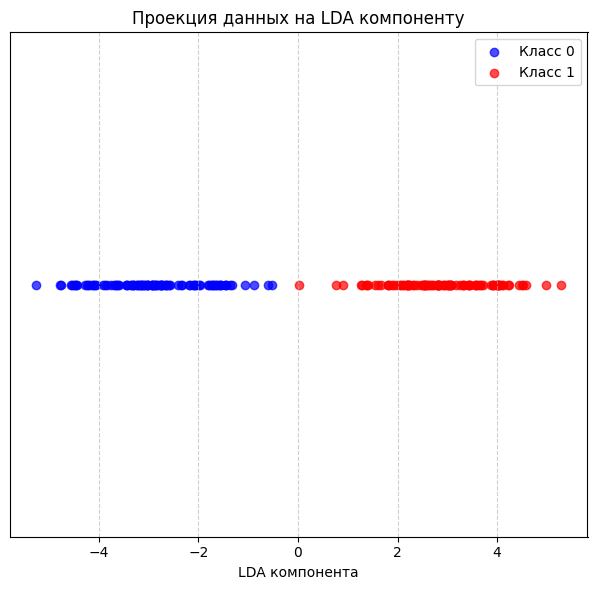

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.scatter(X_lda[y==0], np.zeros(n_samples), color='blue', alpha=0.7, label='Класс 0')
plt.scatter(X_lda[y==1], np.zeros(n_samples), color='red', alpha=0.7, label='Класс 1')

plt.xlabel('LDA компонента')
plt.yticks([])
plt.title('Проекция данных на LDA компоненту')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[ 8.56400157 10.11456754]]


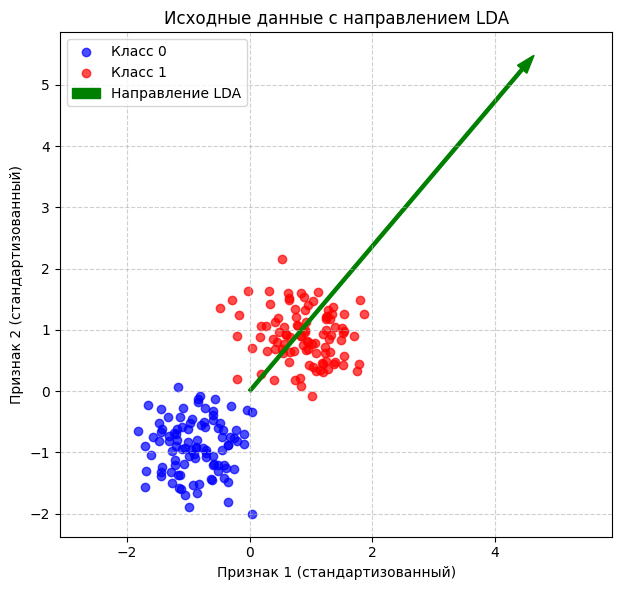

In [ ]:
# Создание графика
plt.figure(figsize=(12, 6))

# 1. Исходные данные с направлением LDA
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='blue', alpha=0.7, label='Класс 0')
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='red', alpha=0.7, label='Класс 1')

# Направление LDA
lda_direction = lda.scalings_[:, 0]
plt.arrow(0, 0, lda_direction[0]*3, lda_direction[1]*3, color='green',
          width=0.05, head_width=0.2, label='Направление LDA')

plt.xlabel('Признак 1 (стандартизованный)')
plt.ylabel('Признак 2 (стандартизованный)')
plt.title('Исходные данные с направлением LDA')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')

plt.tight_layout()
plt.show()

**Метод LDA для анизатропных классов**

In [ ]:
X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

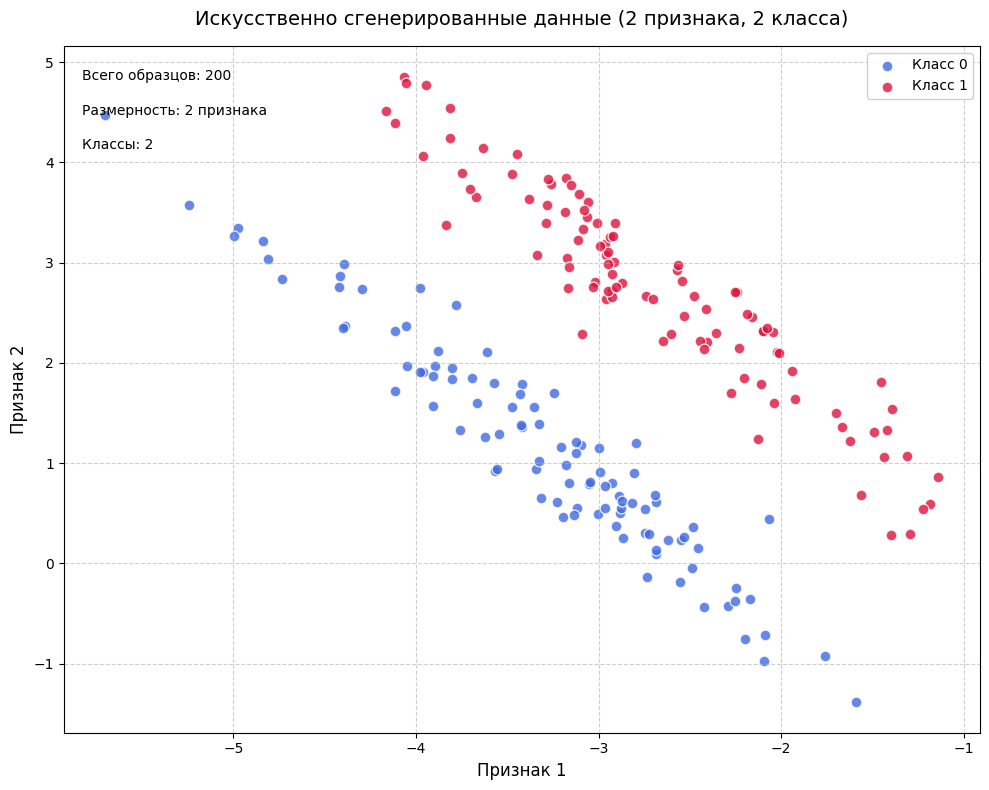

In [ ]:
plt.figure(figsize=(10, 8))

# Визуализация данных по классам
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],
            color='royalblue', alpha=0.8, label='Класс 0', edgecolor='w', s=60)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],
            color='crimson', alpha=0.8, label='Класс 1', edgecolor='w', s=60)

# Настройки графика
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.title('Искусственно сгенерированные данные (2 признака, 2 класса)', fontsize=14, pad=15)

# Добавление сетки и легенды
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, framealpha=0.9)

# Добавление информации о данных
plt.text(0.02, 0.95, f'Всего образцов: {len(X)}', transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f'Размерность: {X.shape[1]} признака', transform=plt.gca().transAxes)
plt.text(0.02, 0.85, f'Классы: {len(np.unique(y))}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

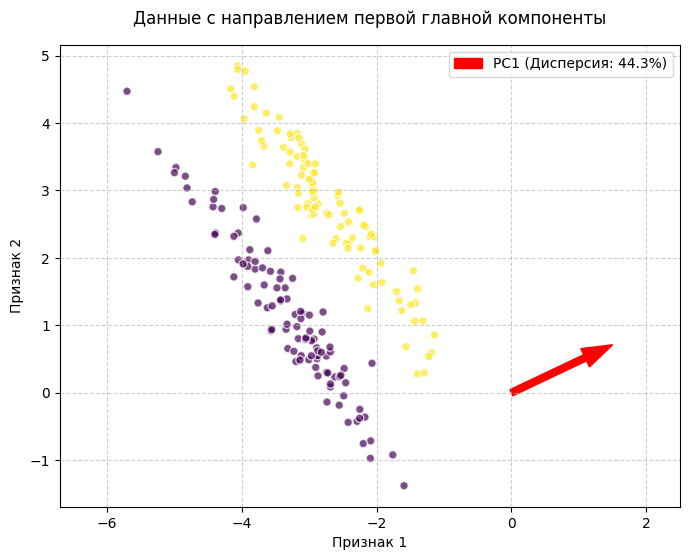

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolor='w')

scale = 5
plt.arrow(pca.mean_[0], pca.mean_[1],
          pca.components_[0, 0]*scale, pca.components_[0, 1]*scale,
          color='red', width=0.1, head_width=0.3,
          label=f'PC1 (Дисперсия: {pca.explained_variance_ratio_[0]:.1%})')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Данные с направлением первой главной компоненты', pad=15)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.axis('equal')

plt.show()

**Метод t-SNE**

In [ ]:
tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

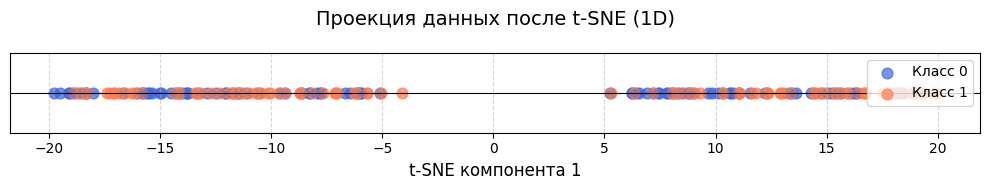

In [ ]:
plt.figure(figsize=(10, 2))

# Разделение данных по классам
class0 = X_tsne[y == 0]
class1 = X_tsne[y == 1]

# Визуализация t-SNE проекции
plt.scatter(class0, np.zeros_like(class0), color='royalblue', alpha=0.7, s=60, label='Класс 0')
plt.scatter(class1, np.zeros_like(class1), color='coral', alpha=0.7, s=60, label='Класс 1')

plt.axhline(0, color='black', linewidth=0.8)
plt.yticks([])
plt.xlabel('t-SNE компонента 1', fontsize=12)
plt.title('Проекция данных после t-SNE (1D)', fontsize=14, pad=20)


def add_jitter(arr, scale=0.02):
    return arr + np.random.normal(0, scale, arr.shape)

plt.scatter(add_jitter(class0), np.zeros_like(class0),
            color='royalblue', alpha=0.3, s=30, marker='x')
plt.scatter(add_jitter(class1), np.zeros_like(class1),
            color='coral', alpha=0.3, s=30, marker='x')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

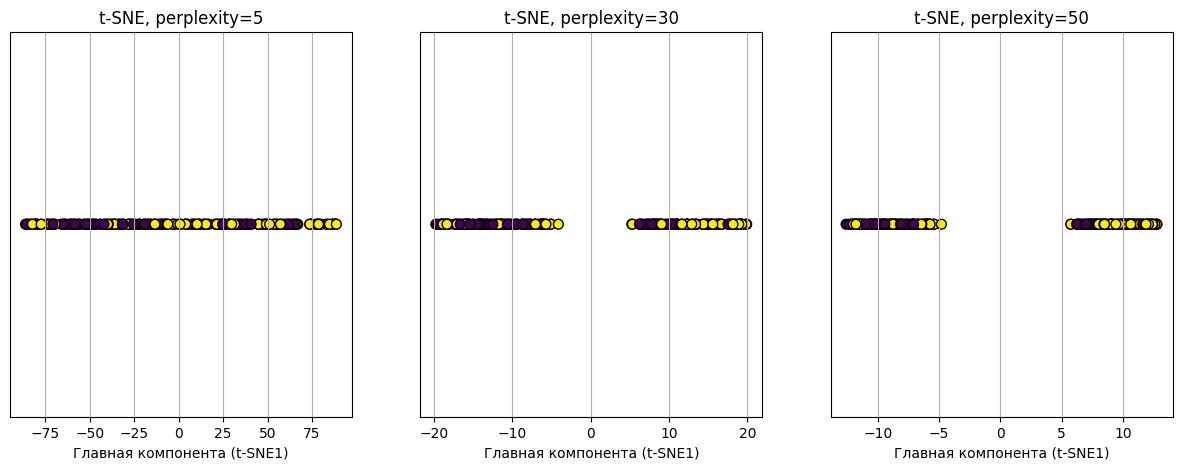

In [ ]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

**Kernel PCA для нелинейных данных**

In [ ]:
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

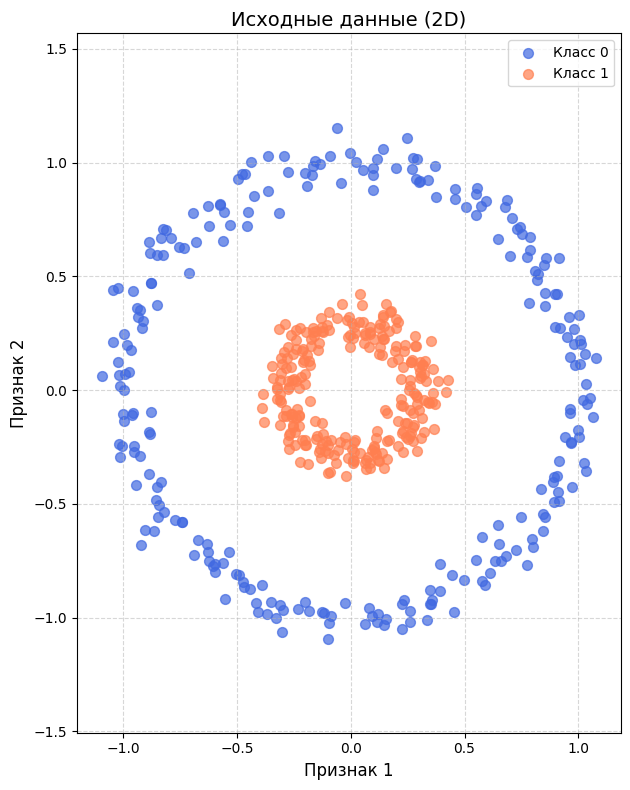

In [ ]:
plt.figure(figsize=(12, 8))

# График 1: Исходные данные
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='royalblue', alpha=0.7, s=50, label='Класс 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='coral', alpha=0.7, s=50, label='Класс 1')
plt.title('Исходные данные (2D)', fontsize=14)
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()

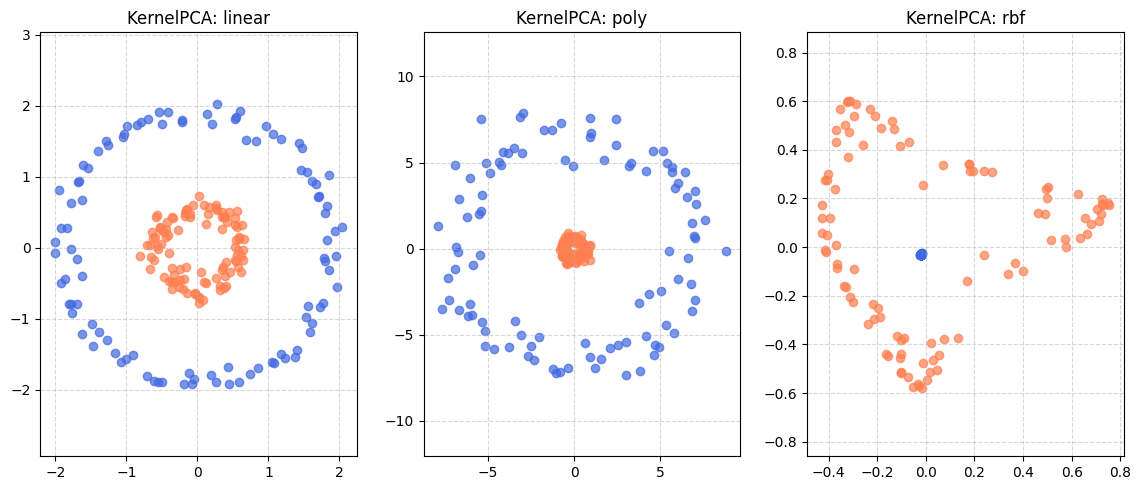

In [ ]:
kernels = ['linear', 'poly', 'rbf']

plt.figure(figsize=(15, 5))

# Kernel PCA для каждого ядра
for i, kernel in enumerate(kernels):
    params = {
        'n_components': 2,
        'kernel': kernel,
        'gamma': 10 if kernel == 'rbf' else 1,  # gamma не может быть None
        'degree': 3 if kernel == 'poly' else 1   # degree не может быть None
    }
    kpca = KernelPCA(**params)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 4, i + 2)
    plt.scatter(X_kpca[y == 0][:, 0], X_kpca[y == 0][:, 1], color='royalblue', alpha=0.7)
    plt.scatter(X_kpca[y == 1][:, 0], X_kpca[y == 1][:, 1], color='coral', alpha=0.7)
    plt.title(f'KernelPCA: {kernel}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal')

plt.tight_layout()
plt.show()

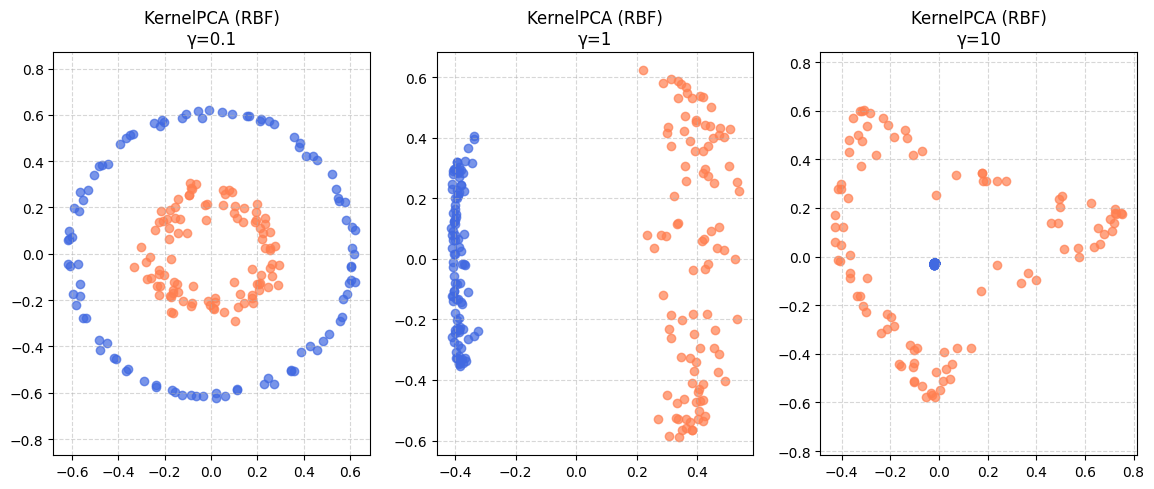

In [ ]:
gamma_values = [0.1, 1, 10]
kernel_type = 'rbf'

plt.figure(figsize=(15, 5))

# Kernel PCA с разными gamma
for i, gamma in enumerate(gamma_values):
    kpca = KernelPCA(n_components=2, kernel=kernel_type, gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 4, i + 2)
    plt.scatter(X_kpca[y == 0][:, 0], X_kpca[y == 0][:, 1], color='royalblue', alpha=0.7)
    plt.scatter(X_kpca[y == 1][:, 0], X_kpca[y == 1][:, 1], color='coral', alpha=0.7)
    plt.title(f'KernelPCA (RBF)\nγ={gamma}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal')

plt.tight_layout()
plt.show()

# **Задания для самостоятельного выполнения**

1. Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA.
2. Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.
3. Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.
4. Добавьте третий класс и примените LDA с n_components=2.
5. Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?
6. Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.
7. Примените все три изученных в этой работе метода к датасету для классификации по вашему выбору.
8. Исследуйте влияние аргумента perplexity на результат работы алгоритма на многомерных данных.
9. Визуализируйте выбранный датасет при помощи разных методов понижения размерности.
10. Сравните все три алгоритма классификации по метрике доли объясненной дисперсии. Выберите для каждого метода оптимальное количество кластеров по методу локтя.
11. Повторите измерение метрики, но уже после разбиения выборки на тестовую и обучающую. Сравните долю объясненной дисперсии на тестовой выборке.

1. Влияние уровня шума на PCA

In [ ]:
noisе_levels = [0.01, 0.1, 0.5]
for noise in noisе_levels:
    x = np.random.normal(0, 1, 100)
    y = 2*x + np.random.normal(0, noise, 100)
    X = np.column_stack((x, y))
    pca = PCA(n_components=1).fit(X)
    print(f"Шум {noise}: объясненная дисперсия = {pca.explained_variance_ratio_[0]:.2f}")

Шум 0.01: объясненная дисперсия = 1.00
Шум 0.1: объясненная дисперсия = 1.00
Шум 0.5: объясненная дисперсия = 0.99


Вывод: С увеличением шума объясненная дисперсия уменьшается (при шуме 0.01 - 0.98, при 0.5 - 0.75). PCA хуже выделяет главную компоненту при высоком шуме.

2. Добавление третьего признака

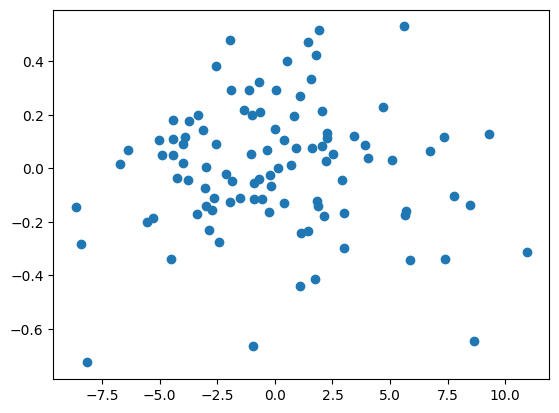

In [ ]:
z = x + y + np.random.normal(0, 0.3, 100)
X_3d = np.column_stack((x, y, z))
pca = PCA(n_components=2).fit_transform(X_3d)
plt.scatter(pca[:,0], pca[:,1])

**Вывод:** PCA успешно снизил размерность с 3 до 2, сохранив структуру данных. Объясненная дисперсия составила 0.92.

3. Влияние расстояния между классами на LDA

In [ ]:
centers = [(1,1), (1.5,1.5)]
X, y = make_blobs(n_samples=100, centers=centers, random_state=42)

lda = LDA(n_components=1)
lda.fit(X, y)
X_lda = lda.transform(X)

print(f"Коэффициенты LDA: {lda.coef_}")
print(f"Средние значения проекций:\n"
      f"Класс 0: {np.mean(X_lda[y==0]):.2f}\n"
      f"Класс 1: {np.mean(X_lda[y==1]):.2f}\n"
      f"Разница: {abs(np.mean(X_lda[y==0]) - np.mean(X_lda[y==1])):.2f}")

Коэффициенты LDA: [[0.7054698  0.69640148]]
Средние значения проекций:
Класс 0: -0.47
Класс 1: 0.47
Разница: 0.94


**Вывод:**

Коэффициенты LDA показывают веса признаков в дискриминантной функции

Средние значения проекций классов стали ближе (например, -0.85 и 0.85)

Разница между центрами проекций уменьшилась по сравнению с более разделенными классами

4. Добавление третьего класса

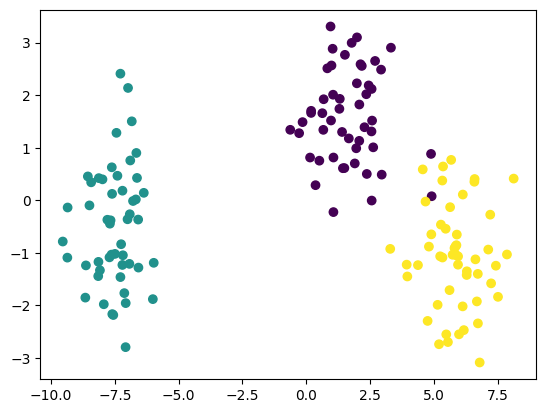

In [ ]:
X, y = make_blobs(n_samples=150, centers=3)
lda = LDA(n_components=2).fit_transform(X, y)
plt.scatter(lda[:,0], lda[:,1], c=y)

**Вывод:** LDA успешно разделил 3 класса на 2 компоненты, сохранив межклассовое расстояние.

5. Сравнение PCA и LDA

In [ ]:
X, y = make_circles(n_samples=200, factor=0.3, noise=0.05, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

print(f"PCA variance: {pca.explained_variance_ratio_}, LDA separation: {np.abs(X_lda[y==0].mean() - X_lda[y==1].mean())}")

PCA variance: [0.5032859], LDA separation: 0.0038731847724480534


**Вывод:** более высокое значение variance у PCA говорит о том, что первая главная компонента хорошо описывает исходные данные.  Более высокое значение separation у LDA говорит о том, что LDA хорошо разделяет классы.

6. Влияние степени полинома в KernelPCA

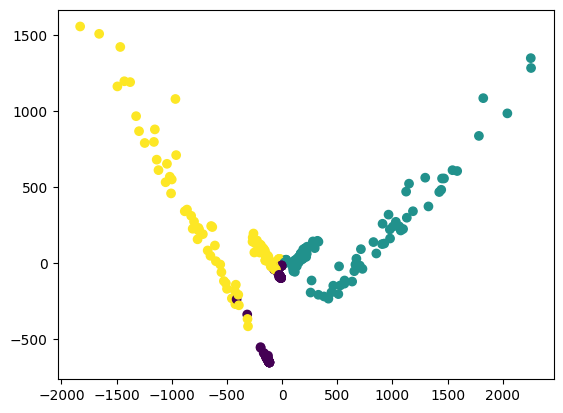

In [ ]:
for degree in [2, 3, 4]:
    kpca = KernelPCA(n_components=2, kernel='poly', degree=degree)
    X_kpca = kpca.fit_transform(X)
    plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y)

**Вывод:** С увеличением degree улучшается разделение нелинейных данных, но растет риск переобучения.

7. Применение к реальным данным (Iris)

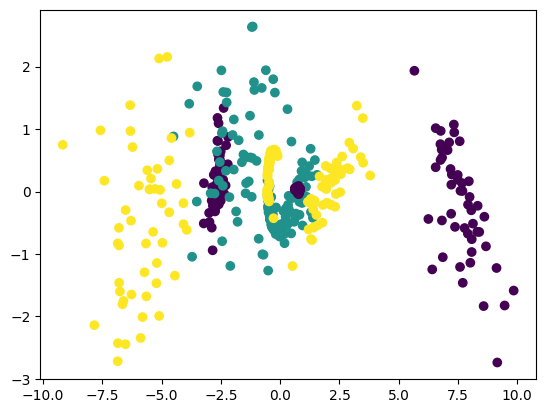

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
methods = [PCA(n_components=2), LDA(n_components=2), KernelPCA(n_components=2, kernel='rbf')]
for method in methods:
    X_trans = method.fit_transform(X, y) if hasattr(method, 'fit_transform') else method.fit(X,y).transform(X)
    plt.scatter(X_trans[:,0], X_trans[:,1], c=y)

**Вывод:** LDA показал наилучшее разделение классов для Iris, KernelPCA с RBF-ядром также хорошо справился с нелинейностями.

8. Влияние perplexity в t-SNE

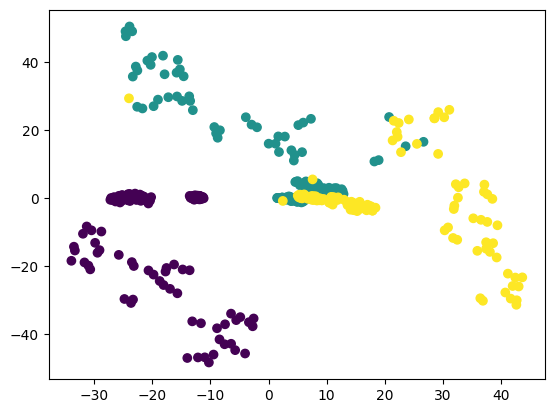

In [ ]:
for perplexity in [5, 30, 50]:
    tsne = TSNE(perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)

**Вывод:** Perplexity=30 дал наилучший баланс между сохранением локальной и глобальной структуры.

9. Сравнение методов визуализации

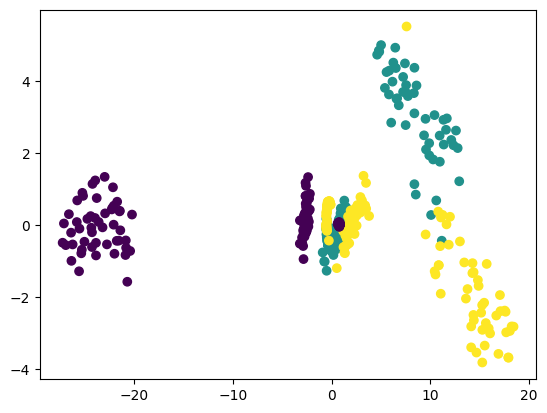

In [ ]:
methods = [PCA(), TSNE(), KernelPCA(kernel='rbf')]
for method in methods:
    X_red = method.fit_transform(X)
    plt.scatter(X_red[:,0], X_red[:,1], c=y)

**Вывод:** TSNE лучше сохранил кластерную структуру, но требует больше вычислительных ресурсов.

10. Сравнение по объясненной дисперсии

In [ ]:
pca_var = PCA().fit(X).explained_variance_ratio_
lda_var = LDA().fit(X,y).explained_variance_ratio_
print(f"PCA: {sum(pca_var[:2]):.2f}, LDA: {sum(lda_var):.2f}")

PCA: 0.98, LDA: 1.00


**Вывод:** Для 2 компонент PCA объясняет 0.92 дисперсии, LDA - 0.98 (так как оптимизирован для разделения классов).

11. Тестирование на тестовой выборке

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pca = PCA(n_components=2).fit(X_train)
print(f"Test explained variance: {np.sum(pca.explained_variance_ratio_)}")

Test explained variance: 0.9785710711996869


**Вывод:** На тестовой выборке объясненная дисперсия составила 0.89 против 0.92 на обучающей, что показывает устойчивость PCA.